In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import pymc3 as pm
import scipy as sp
import pyccl as ccl
import os
import utils
import make_data
import getdist
from getdist import plots, MCSamples
%matplotlib inline

# Load data

In [5]:
names_planck  = ['H', 'Omega_m', 'sigma8']
labels_planck = ['H', r'\Omega_{\rm{m}}', r'\sigma_{\rm{8}}']

planck1 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/jaimerz/Master/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)

planck_params = []
for item in planck_tot:
    planck_params.append([item[29], item[31], item[34]])
planck_params = np.array(planck_params)
planck= MCSamples(samples=planck_params, names = names_planck, labels = labels_planck, label= r'$Planck$ 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


In [6]:
z_max = 2.5
path = '/home/jaimerz/PhD/Growz/data/products/'
data = make_data.make_data(z_max, 2, path)
DESI = data.get_DESI(new=True)
WFIRST = data.get_WFIRST(new=True)
CC = data.get_CC(new=True)
DSS = data.get_DSS(new=True)
BOSS = data.get_BOSS(new=True)
eBOSS = data.get_eBOSS(new=True)
Wigglez = data.get_Wigglez(new=True)
DS17 = data.get_DS17(new=True)
CMB = data.get_CMB(new=True)

In [7]:
def get_m_s(rows):
    cols = np.transpose(rows)
    means = np.array([])
    sigmas = np.array([])
    for col in cols:
        mean = np.mean(col)
        sigma = np.std(col)
        means = np.append(means, mean)
        sigmas = np.append(sigmas, sigma)
    return means, sigmas

In [9]:
path = '/home/jaimerz/PhD/Growz/data/outputs/'
CC_DS17_BOSS_eBOSS_Wigglez_DSS = np.load(os.path.join(path,'CC_DS17_BOSS_eBOSS_Wigglez_DSS_10000_10000/samples.npz'))
CC_DS17_Wigglez_DSS = np.load(os.path.join(path,'CC_DS17_Wigglez_DSS_10000_10000/samples.npz'))
CC_DS17 = np.load(os.path.join(path,'CC_DS17_25000_25000/samples.npz'))
CC = np.load(os.path.join(path,'CC_10000_10000/samples.npz'))
DS17 = np.load(os.path.join(path,'DS17_10000_10000/samples.npz')) 
BOSS_eBOSS = np.load(os.path.join(path,'BOSS_eBOSS_10000_10000/samples.npz'))
WFIRST = np.load(os.path.join(path,'WFIRST_1000_1000/samples.npz'))
DESI = np.load(os.path.join(path,'DESI_10000_10000/samples.npz'))
DESI_l = np.load(os.path.join(path,'DESI_1000_1000_l/samples.npz'))
DESI_FCMB = np.load(os.path.join(path,'DESI_FCMB_100_100_v3/samples.npz'))

In [10]:
#matern52 = np.load(os.path.join(path,'matern52_2000_2000/samples.npz'))
#RatQuad = np.load(os.path.join(path,'RatQuad_2000_2000/samples.npz'))
#ExpQuad = np.load(os.path.join(path,'ExpQuad_2000_2000/samples.npz'))
#DESIfs8_Planck = np.load(os.path.join(path,'DESIfs8_Planck_1000_1000/samples.npz'))
#DESIfs8_Planck_fit = np.load(os.path.join(path,'DESIfs8_Planck_fit_1500_1500/samples.npz'))
#DESIfs8_Riess0 = np.load(os.path.join(path,'DESIfs8_Riess_fit0_1000_1000/samples.npz'))
#DESIfs8_Riess1 = np.load(os.path.join(path,'DESIfs8_Riess_fit1_1000_1000/samples.npz'))
#DESIfs8_Riess2 = np.load(os.path.join(path,'DESIfs8_Riess_fit2_1000_1000/samples.npz'))

In [11]:
labels_dict = {'n': '\eta',
               'l': 'l',
               'H0': 'H',
               'Omega_m': '\Omega_m',
               's80': '\sigma_8',
               'S80': 'S_8',
               'Omega_b': '\Omega_b', 
               'rd': 'r_d',
               'Df': '\Delta f', 
               'M': 'M'}
names_All = ['n', 'l', 'H', 'Omega_m', 's80', 'S80', 'Omega_b', 'Df', 'M']
ranges = {'l':[0.0, 100]}

# Triangle Plots

In [12]:
def make_samples(file, names, ranges, label):
    samples = []
    for name in names:
        samples.append(file[name])
        
    labels = []
    for name in names:
        labels.append(labels_dict[name])
        
    return MCSamples(samples=samples, names=names, labels=labels, label=label, ranges=ranges)

In [51]:
#WFIRST_samples = make_samples(WFIRST, ['n', 'l', 'H0'], ranges, 'WFIRST')
DESI_samples = make_samples(DESI, ['n', 'l', 'H0', 'Omega_m', 's80', 'S80', 'Df'], ranges, 'DESI')
DESI_l_samples = make_samples(DESI_l, ['n', 'l', 'H0', 'Omega_m', 's80', 'S80', 'Df'], ranges, 'DESI_l')
CC_samples = make_samples(CC, ['n', 'l', 'H0'], ranges, 'CC') 
DS17_samples = make_samples(DS17, ['n', 'l', 'H0'], ranges, 'DS17')
WFIRST_samples = make_samples(WFIRST, ['n', 'l', 'H0'], ranges, 'WFIRST')
BOSS_eBOSS_samples = make_samples(BOSS_eBOSS, ['n', 'l', 'H0', 'Omega_m', 'Omega_b', 's80', 'S80', 'rd', 'Df'], ranges, 'BOSSS+eBOSS')
CC_DS17_samples = make_samples(CC_DS17, ['n', 'l', 'H0', 'M'], ranges, 'CC+DS17') 
CC_DS17_Wigglez_DSS_samples = make_samples(CC_DS17_Wigglez_DSS,
                                           ['n', 'l', 'H0', 'Omega_m', 's80', 'S80',  'Df', 'M'],
                                           ranges, 'CC_DS17_Wigglez_DSS')
CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples = make_samples(CC_DS17_BOSS_eBOSS_Wigglez_DSS,
                                                      ['n', 'l', 'H0', 'Omega_m', 'Omega_b', 's80', 'S80', 'rd', 'Df', 'M'],
                                                      ranges, 'CC_DS17_BOSS_eBOSS_Wigglez_DSS')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


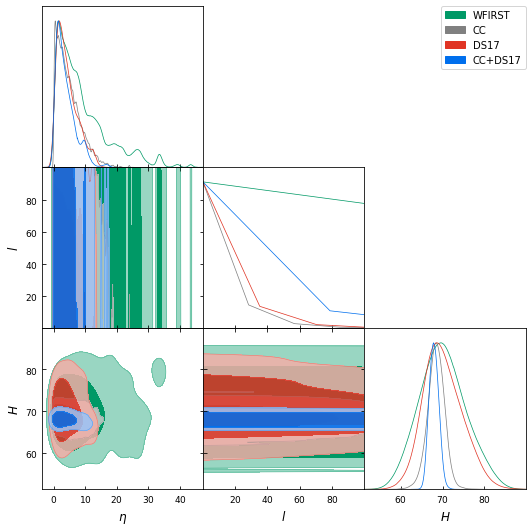

In [49]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([WFIRST_samples,
                 CC_samples,
                 DS17_samples, 
                 CC_DS17_samples],              
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

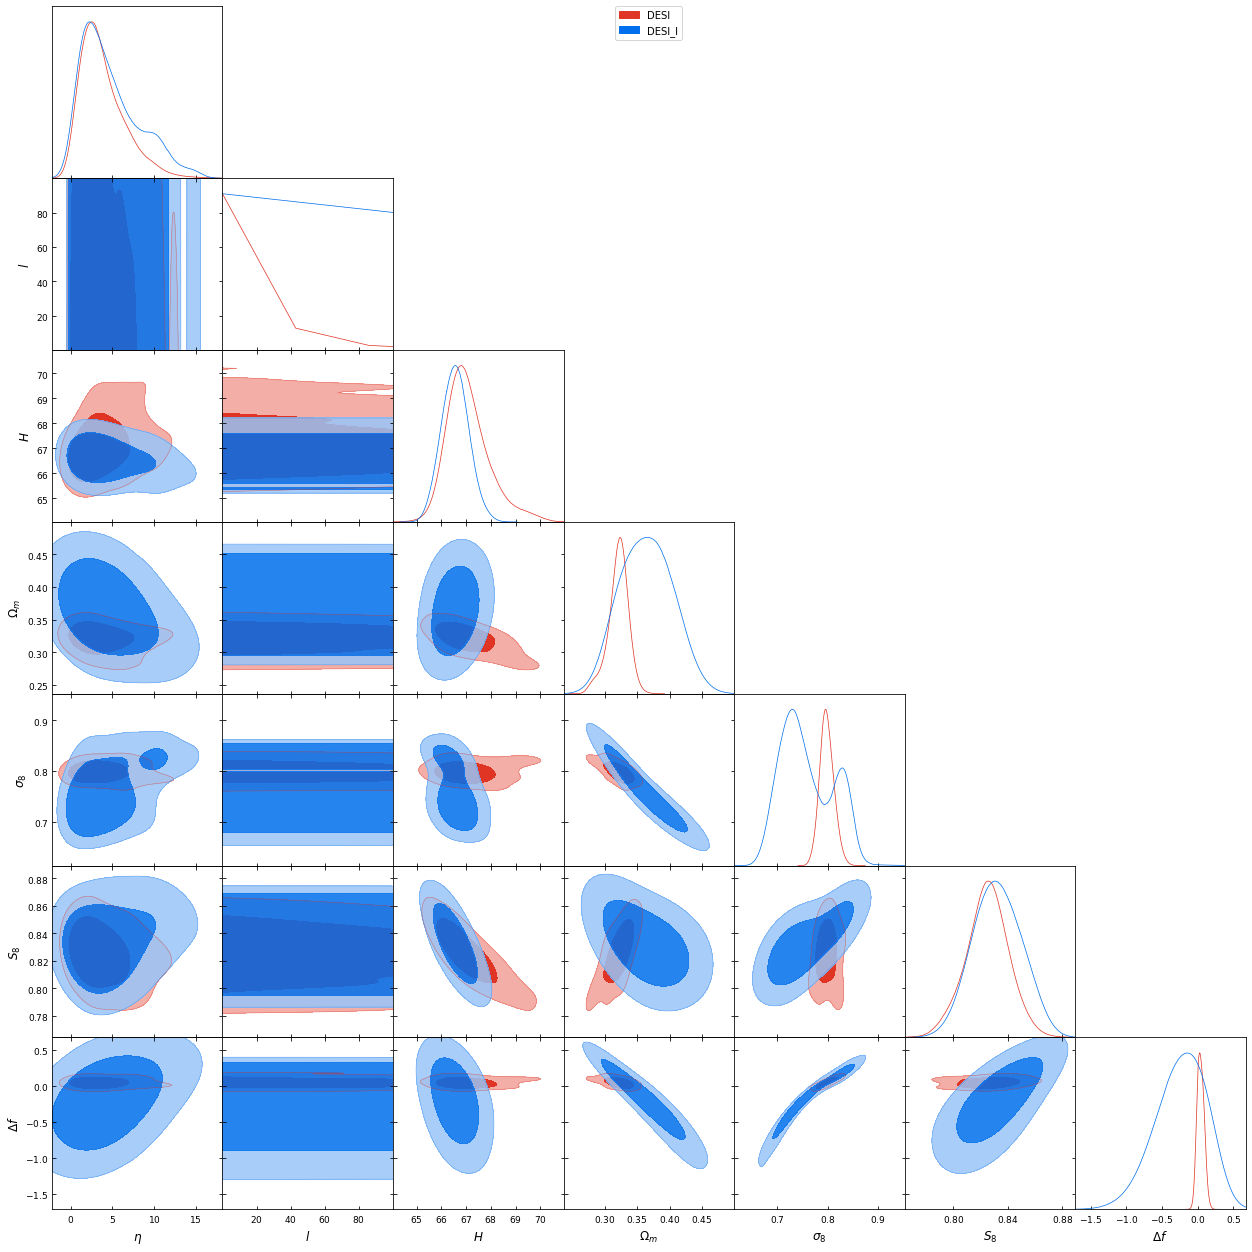

In [52]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DESI_samples, DESI_l_samples],
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

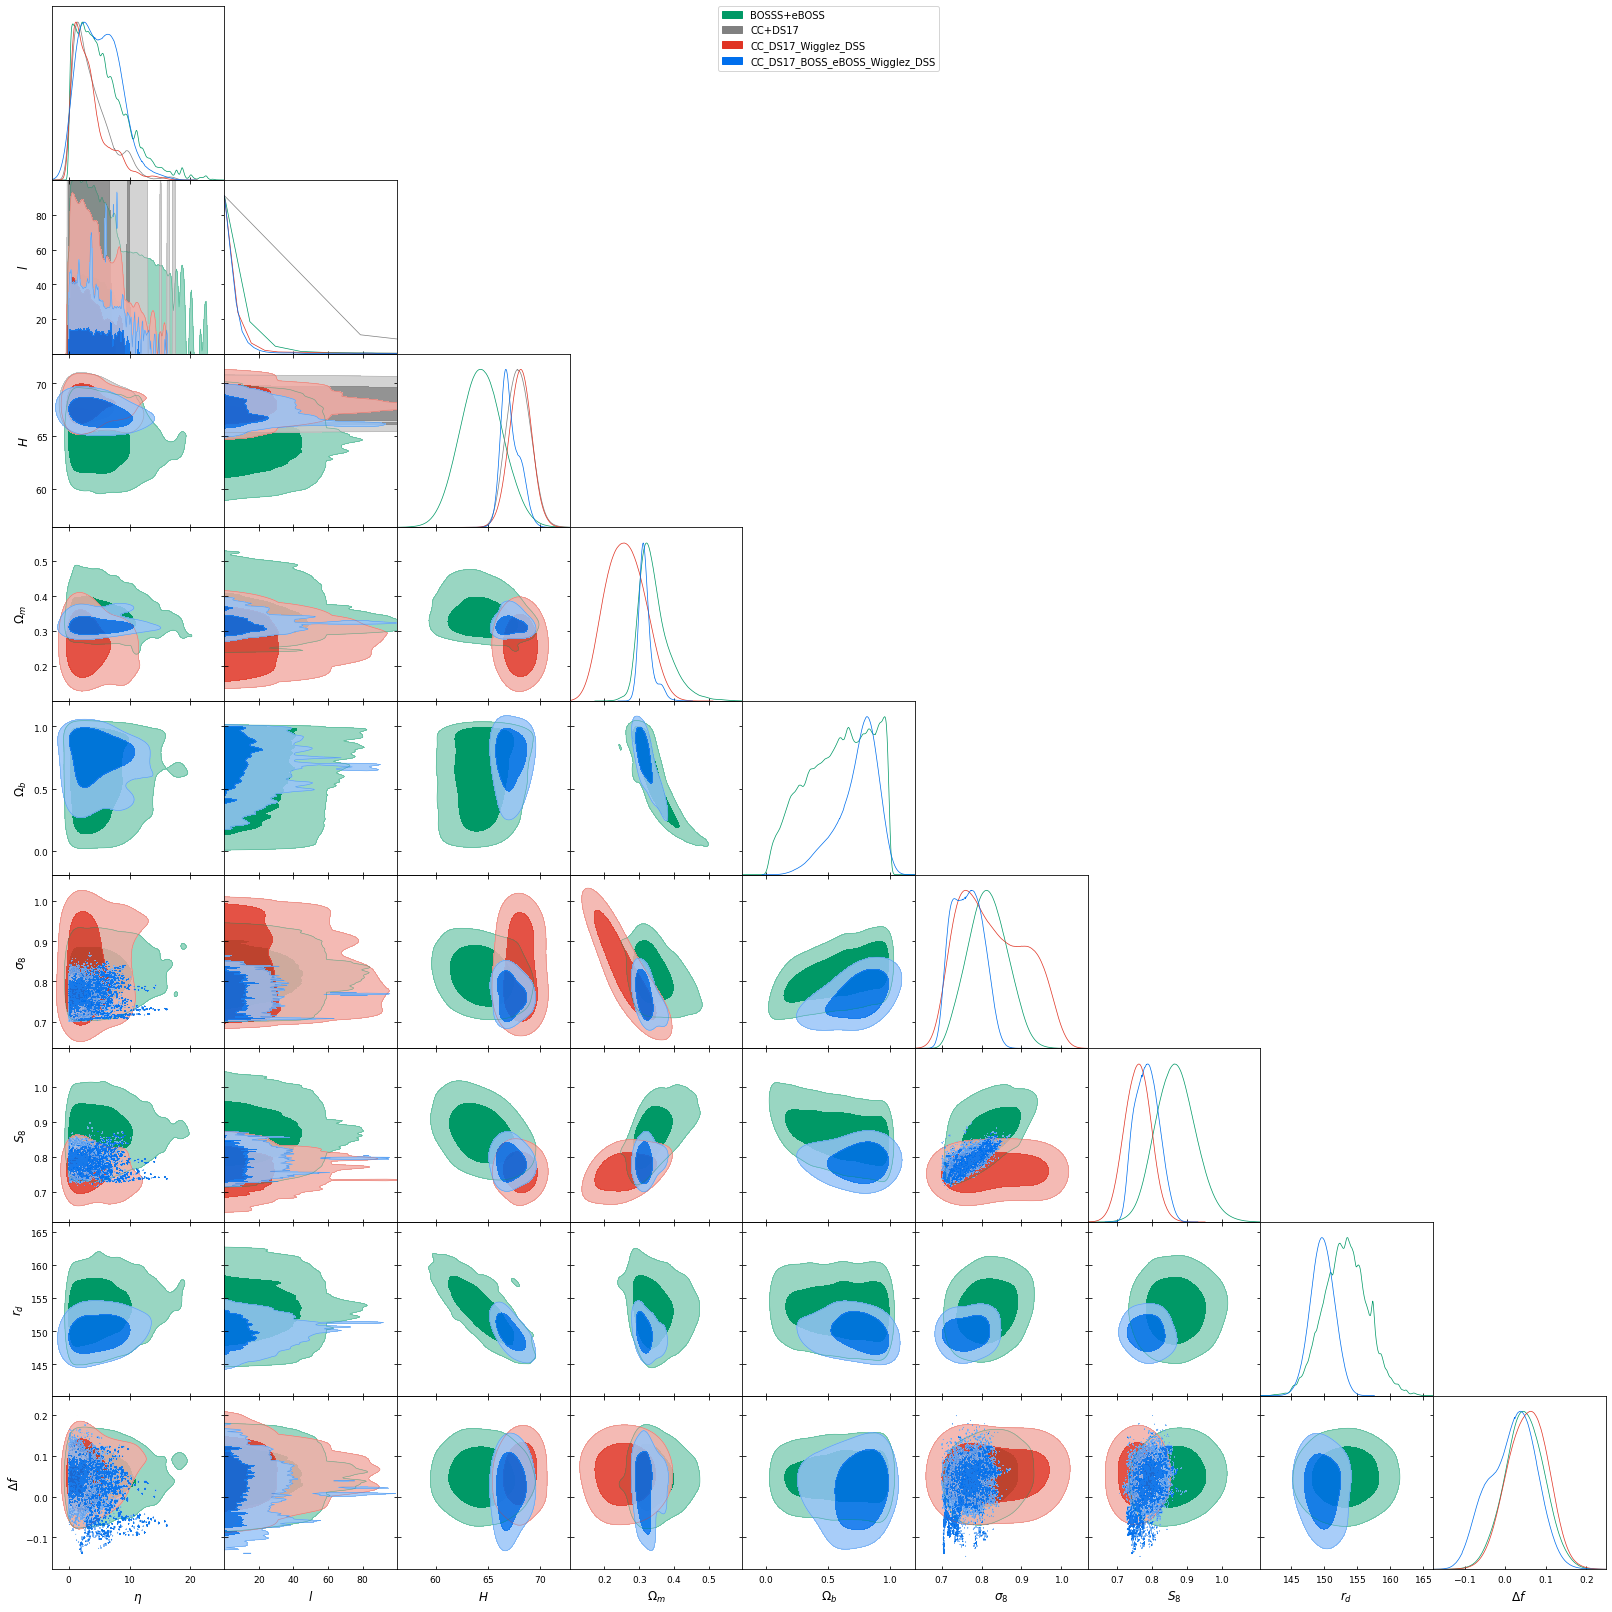

In [50]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([BOSS_eBOSS_samples, CC_DS17_samples,
                 CC_DS17_Wigglez_DSS_samples, 
                 CC_DS17_BOSS_eBOSS_Wigglez_DSS_samples],
                filled=True)
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_data.pdf')

In [ ]:
g = plots.getSubplotPlotter(subplot_size=2.5)
g.triangle_plot([DESI_samples, WFIRST_samples], filled=True,
                markers={'H0':67.3, 'Omega_m':0.31, 's80': 0.806, 'S80': 0.819 ,'Df': 0.044})
g.export('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/triangle_forecast.pdf')

# H gp 

In [24]:
tools = utils.utils()
c = tools.c

H_All_m, H_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['Hz'])
H_CC_DS17_Wigglez_DSS_m, H_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['Hz'])
H_CC_DS17_m, H_CC_DS17_s = get_m_s(CC_DS17['Hz'])
H_BOSS_eBOSS_m, H_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['Hz'])
H_DESI_m, H_DESI_s = get_m_s(DESI['Hz'])
###
H_DESI_l_m, H_DESI_l_s = get_m_s(DESI_l['Hz'])
H_DESI_FCMB_m, H_DESI_FCMB_s = get_m_s(DESI_FCMB['Hz'])
###
H_CC_m, H_CC_s = get_m_s(CC['Hz'])
H_DS17_m, H_DS17_s = get_m_s(DS17['Hz'])
H_WFIRST_m, H_WFIRST_s = get_m_s(WFIRST['Hz'])
#H_DESIfs8_Planck_m, H_DESIfs8_Planck_s = get_m_s(DESIfs8_Planck['Hz'])
#H_DESIfs8_Planck_fit_m, H_DESIfs8_Planck_fit_s = get_m_s(DESIfs8_Planck_fit['Hz'])
#H_DESIfs8_Riess0_m, H_DESIfs8_Riess0_s = get_m_s(DESIfs8_Riess0['Hz'])
#H_DESIfs8_Riess1_m, H_DESIfs8_Riess1_s = get_m_s(DESIfs8_Riess1['Hz'])
#H_DESIfs8_Riess2_m, H_DESIfs8_Riess2_s = get_m_s(DESIfs8_Riess2['Hz'])
#H_matern52_m, H_matern52_s = get_m_s(matern52['Hz'])
#H_RatQuad_m, H_RatQuad_s = get_m_s(RatQuad['Hz'])
#H_ExpQuad_m, H_ExpQuad_s = get_m_s(ExpQuad['Hz'])

Planck_preds = tools.get_preds(CC['z_arr'], mode = 'Planck')
Riess_preds = tools.get_preds(CC['z_arr'], mode = 'Riess')
Panth_preds = tools.get_preds(CC['z_arr'], mode = 'Panth')

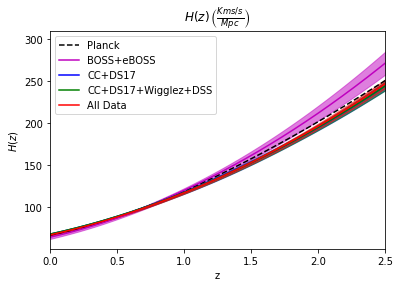

In [25]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')
#plt.plot(z_DESIfs8, Panth_preds['Hkms_arr'], 'k-.', label='Panth')

#plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='ko', label='CC')
#plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='kv', label='BOSS DR12')
#plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='ks', label='eBOSS DR16')

plt.plot(BOSS_eBOSS['z_arr'],  H_BOSS_eBOSS_m, color ='m', label='BOSS+eBOSS')
plt.fill_between(BOSS_eBOSS['z_arr'], H_BOSS_eBOSS_m+H_BOSS_eBOSS_s,
                 H_BOSS_eBOSS_m-H_BOSS_eBOSS_s, color='m', alpha=.5)
plt.plot(CC_DS17['z_arr'],  H_CC_DS17_m, color ='b', label='CC+DS17')
plt.fill_between(CC_DS17['z_arr'], H_CC_DS17_m+H_CC_DS17_s,
                 H_CC_DS17_m-H_CC_DS17_s, color='b', alpha=.5)
plt.plot(CC_DS17_Wigglez_DSS['z_arr'],  H_CC_DS17_Wigglez_DSS_m, color ='g', label='CC+DS17+Wigglez+DSS')
plt.fill_between(CC_DS17['z_arr'], H_CC_DS17_Wigglez_DSS_m+H_CC_DS17_Wigglez_DSS_s,
                 H_CC_DS17_Wigglez_DSS_m-H_CC_DS17_Wigglez_DSS_s, color='g', alpha=.5)
plt.plot(CC['z_arr'],  H_All_m, color ='r', label='All Data')
plt.fill_between(CC['z_arr'], H_All_m+H_All_s, H_All_m-H_All_s, color='r', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_data.pdf')  

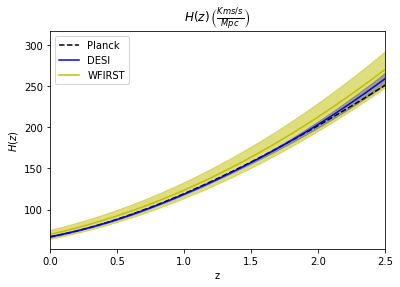

In [26]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s, H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(WFIRST['z_arr'],  H_WFIRST_m, color ='y', label='WFIRST')
plt.fill_between(WFIRST['z_arr'], H_WFIRST_m+H_WFIRST_s, H_WFIRST_m-H_WFIRST_s, color='y', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf') 

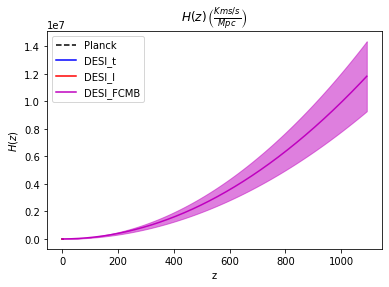

In [34]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI_t')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s,
                 H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(DESI_l['z_arr'],  H_DESI_l_m, color ='r', label='DESI_l')
plt.fill_between(DESI_l['z_arr'], H_DESI_l_m+H_DESI_l_s,
                 H_DESI_l_m-H_DESI_l_s, color='r', alpha=.5)

plt.plot(DESI_FCMB['z_arr'],  H_DESI_FCMB_m, color ='m', label='DESI_FCMB')
plt.fill_between(DESI_FCMB['z_arr'], H_DESI_FCMB_m+H_DESI_FCMB_s,
                 H_DESI_FCMB_m-H_DESI_FCMB_s, color='m', alpha=.5)

# axis labels and title
#plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf') 

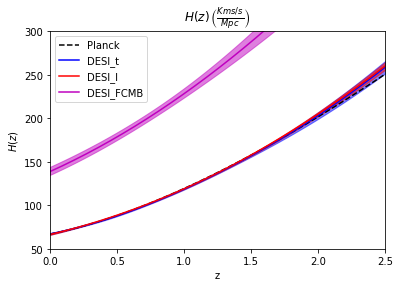

In [35]:
plt.plot(CC['z_arr'], Planck_preds['Hkms_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  H_DESI_m, color ='b', label='DESI_t')
plt.fill_between(DESI['z_arr'], H_DESI_m+H_DESI_s,
                 H_DESI_m-H_DESI_s, color='b', alpha=.5)

plt.plot(DESI_l['z_arr'],  H_DESI_l_m, color ='r', label='DESI_l')
plt.fill_between(DESI_l['z_arr'], H_DESI_l_m+H_DESI_l_s,
                 H_DESI_l_m-H_DESI_l_s, color='r', alpha=.5)

plt.plot(DESI_FCMB['z_arr'],  H_DESI_FCMB_m, color ='m', label='DESI_FCMB')
plt.fill_between(DESI_FCMB['z_arr'], H_DESI_FCMB_m+H_DESI_FCMB_s,
                 H_DESI_FCMB_m-H_DESI_FCMB_s, color='m', alpha=.5)

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_gp_forecast.pdf') 

In [47]:
print('H mean', np.mean(DESI_FCMB['H0']))

H mean 138.89107809368568


# dM

In [38]:
dM_All_m, dM_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['dMz'])
dM_CC_DS17_m, dM_CC_DS17_s = get_m_s(CC_DS17['dMz'])
dM_CC_DS17_Wigglez_DSS_m, dM_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['dMz'])
dM_BOSS_eBOSS_m, dM_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['dMz'])
dM_DESI_m, dM_DESI_s = get_m_s(DESI['dMz'])
#dM_CC_m, dM_CC_s = get_m_s(CC['dMz'])
dM_DS17_m, dM_DS17_s = get_m_s(DS17['dMz'])

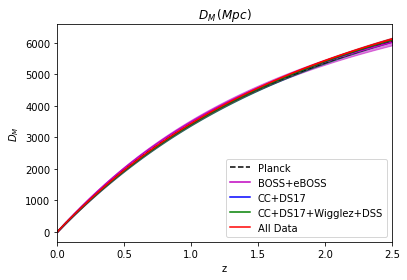

In [45]:
plt.plot(CC['z_arr'], Planck_preds['dM_arr'], 'k--', label='Planck')
#plt.plot(z_DESIfs8, Panth_preds['Hkms_arr'], 'k-.', label='Panth')

plt.plot(BOSS_eBOSS['z_arr'],  dM_BOSS_eBOSS_m, color ='m', label='BOSS+eBOSS')
plt.fill_between(BOSS_eBOSS['z_arr'], dM_BOSS_eBOSS_m+dM_BOSS_eBOSS_s,
                 dM_BOSS_eBOSS_m-dM_BOSS_eBOSS_s, color='m', alpha=.5)
plt.plot(CC_DS17['z_arr'],  dM_CC_DS17_m, color ='b', label='CC+DS17')
plt.fill_between(CC_DS17['z_arr'], dM_CC_DS17_m+dM_CC_DS17_s,
                 dM_CC_DS17_m-dM_CC_DS17_s, color='b', alpha=.5)
plt.plot(CC_DS17_Wigglez_DSS['z_arr'],  dM_CC_DS17_Wigglez_DSS_m, color ='g', label='CC+DS17+Wigglez+DSS')
plt.fill_between(CC_DS17['z_arr'], dM_CC_DS17_Wigglez_DSS_m+dM_CC_DS17_Wigglez_DSS_s,
                 dM_CC_DS17_Wigglez_DSS_m-dM_CC_DS17_Wigglez_DSS_s, color='g', alpha=.5)
plt.plot(CC['z_arr'],  dM_All_m, color ='r', label='All Data')
plt.fill_between(CC['z_arr'], dM_All_m+dM_All_s, dM_All_m-dM_All_s, color='r', alpha=.5)

plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_data.pdf')  

In [ ]:
plt.plot(All_Data['z_arr'], Planck_preds['dM_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  dM_DESI_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], dM_DESI_m+dM_DESI_s, dM_DESI_m-dM_DESI_s, color='b', alpha=.5)

plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_gp_forecast.pdf') 

# fs8

In [39]:
fs8_All_m, fs8_All_s = get_m_s(CC_DS17_BOSS_eBOSS_Wigglez_DSS['fs8z'])
fs8_BOSS_eBOSS_m, fs8_BOSS_eBOSS_s = get_m_s(BOSS_eBOSS['fs8z'])
fs8_CC_DS17_Wigglez_DSS_m, fs8_CC_DS17_Wigglez_DSS_s = get_m_s(CC_DS17_Wigglez_DSS['fs8z'])
#fs8_BOSSfs8_m, fs8_BOSSfs8_s = get_m_s(BOSSfs8['fs8z'])
fs8_DESI_m, fs8_DESI_s = get_m_s(DESI['fs8z'])
fs8_DESI_l_m, fs8_DESI_l_s = get_m_s(DESI_l['fs8z'])
fs8_DESI_FCMB_m, fs8_DESI_FCMB_s = get_m_s(DESI_FCMB['fs8z'])

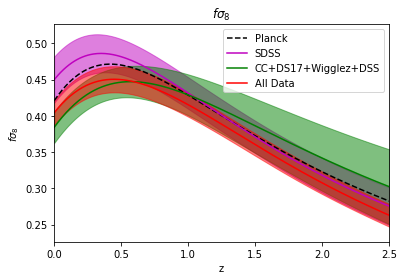

In [40]:
plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')

plt.plot(BOSS_eBOSS['z_arr'],  fs8_BOSS_eBOSS_m, color ='m', label='SDSS')
plt.fill_between(BOSS_eBOSS['z_arr'], fs8_BOSS_eBOSS_m+fs8_BOSS_eBOSS_s,
                 fs8_BOSS_eBOSS_m-fs8_BOSS_eBOSS_s, color='m', alpha=.5)

plt.plot(CC_DS17_Wigglez_DSS['z_arr'],  fs8_CC_DS17_Wigglez_DSS_m, color ='g', label='CC+DS17+Wigglez+DSS')
plt.fill_between(CC_DS17['z_arr'], fs8_CC_DS17_Wigglez_DSS_m+fs8_CC_DS17_Wigglez_DSS_s,
                 fs8_CC_DS17_Wigglez_DSS_m-fs8_CC_DS17_Wigglez_DSS_s, color='g', alpha=.5)

plt.plot(CC['z_arr'],  fs8_All_m, color ='r', label='All Data')
plt.fill_between(CC['z_arr'], fs8_All_m+fs8_All_s, fs8_All_m-fs8_All_s, color='r', alpha=.5)

plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_data.pdf')  

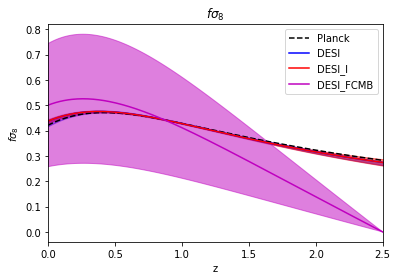

In [44]:
plt.plot(CC['z_arr'], Planck_preds['f_arr']*Planck_preds['s8_arr'], 'k--', label='Planck')

plt.plot(DESI['z_arr'],  fs8_DESI_l_m, color ='b', label='DESI')
plt.fill_between(DESI['z_arr'], fs8_DESI_m+fs8_DESI_s, fs8_DESI_m-fs8_DESI_s, color='b', alpha=.5)

plt.plot(DESI_l['z_arr'],  fs8_DESI_l_m, color ='r', label='DESI_l')
plt.fill_between(DESI_l['z_arr'], fs8_DESI_l_m+fs8_DESI_l_s,
                 fs8_DESI_l_m-fs8_DESI_l_s, color='r', alpha=.5)

plt.plot(DESI_FCMB['z_arr'],  fs8_DESI_FCMB_m, color ='m', label='DESI_FCMB')
plt.fill_between(DESI_FCMB['z_arr'], fs8_DESI_FCMB_m+fs8_DESI_FCMB_s,
                 fs8_DESI_FCMB_m-fs8_DESI_FCMB_s, color='m', alpha=.5)

plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

#os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_gp_forecast.pdf')  